1. What is Seaborn?
-------------------
Seaborn is a Python data visualization library built on top of Matplotlib.
It provides a high-level interface for creating attractive and informative
statistical graphics.

2. Why use Seaborn over Matplotlib?
------------------------------------
Advantages of Seaborn:

a) SIMPLER SYNTAX:
   - Matplotlib: Multiple lines of code needed for complex plots
   - Seaborn: Single line can create sophisticated visualizations

b) BETTER DEFAULT AESTHETICS:
   - Automatic beautiful color palettes
   - Better default styles and themes
   - More visually appealing plots out of the box

c) STATISTICAL FUNCTIONS:
   - Built-in statistical estimations
   - Automatic confidence intervals
   - Advanced plot types for statistical analysis

d) DATAFRAME INTEGRATION:
   - Works directly with pandas DataFrames
   - Column names as parameters
   - Automatic handling of categorical data

e) COMPLEX PLOTS MADE EASY:
   - Pair plots for multiple variables
   - Facet grids for subplots
   - Heat maps for correlation matrices

Example Comparison:
- Matplotlib: Requires manual calculations for grouped bar plots
- Seaborn: Automatically handles grouping and aggregation

3. Installing Seaborn
---------------------
Run in terminal or command prompt:
    pip install seaborn

Seaborn also requires:
    - matplotlib (automatically installed)
    - pandas (automatically installed)
    - numpy (automatically installed)
"""

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

In [7]:
# Load the BigBasket dataset
df = pd.read_csv('BigBasket Products.csv')


print(df.shape)
print(df.columns)
print(df.head())

(27555, 10)
Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_pri

## 5. Using Built-in Datasets in Seaborn
Seaborn comes with several built-in datasets for practice and learning.  
These are useful for testing code and learning new techniques.

In [8]:
# List all available datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [9]:
# Load a sample dataset
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [10]:
# Show top 5 records
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# Shape of data
tips.shape

(244, 7)

In [12]:
# Data preparation for BigBasket dataset
# Clean data for better visualization
df_clean = df.dropna(subset=['rating'])

In [13]:
df_clean = df_clean[df_clean['sale_price'] < 2000]  # Remove extreme outliers for better visualization

In [14]:
# now check the new data shape:
df_clean.shape

(18770, 10)

# SECTION 2: TYPES OF PLOTS
============================================================================

## 6. **BAR PLOT** – `sns.barplot()`

> **Purpose:**  
> Show *average/mean values* for categories with **confidence intervals**.

**Best for:**  
- *Comparing aggregated values* across categories  
- Visualizing **group differences** clearly  

###  Key Features
- **Automatically calculates mean**  
- *Shows confidence intervals* (error bars)  
- Handles **categorical data** very well  

---

###  Example 1: *Average Sale Price by Category*
We use `sns.barplot()` to display the **mean sale price** for the top 6 categories.  

In [15]:
# Step 1: Pick top 5 categories from your data
top_categories = df['category'].value_counts().head(5).index
df_top = df[df['category'].isin(top_categories)]

In [ ]:
top_categories

Index(['Beauty & Hygiene', 'Gourmet & World Food', 'Kitchen, Garden & Pets',
       'Snacks & Branded Foods', 'Foodgrains, Oil & Masala'],
      dtype='object', name='category')

### Understanding `isin()` with Your Data

When we run `df['category'].isin(top_categories)`, Pandas checks whether each row’s `category` is present in the list of **top 5 categories**.  

It returns a Boolean mask (`True` or `False`) for each row:

0     True   # Beauty & Hygiene → in top_categories  
1     True   # Gourmet & World Food → in top_categories  
2    False   # Cleaning & Household → NOT in top_categories  
3     True   # Kitchen, Garden & Pets → in top_categories  
4    False   # Beverages → NOT in top_categories  
5     True   # Snacks & Branded Foods → in top_categories  
6     True   # Foodgrains, Oil & Masala → in top_categories  
7    False   # Fruits & Vegetables → NOT in top_categories  
8    False   # Eggs, Meat & Fish → NOT in top_categories  
...

Rows with **True** are kept, while rows with **False** are excluded when filtering.  
So the filtered DataFrame (`df_top`) looks like this:

             category              sale_price
0   Beauty & Hygiene            ...

1   Gourmet & World Food        ...

3   Kitchen, Garden & Pets      ...

5   Snacks & Branded Foods      ...

6   Foodgrains, Oil & Masala    ...


/tmp/ipython-input-3428664637.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top, x='category', y='sale_price', ci=None)


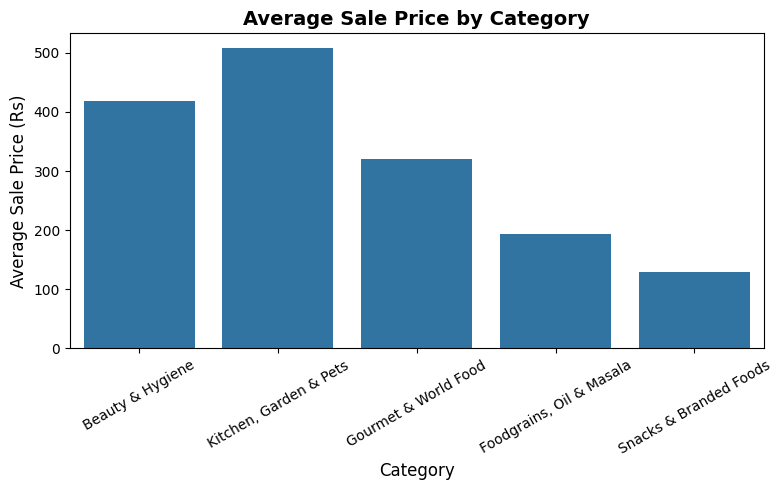

In [16]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a new figure with specific size (width=8, height=5)
plt.figure(figsize=(8, 5))

# Step 2: Draw a bar plot
# - data=df_top → use the filtered dataset
# - x='category' → categories on the X-axis
# - y='sale_price' → average sale price on the Y-axis
# - ci=None → no error bars
sns.barplot(data=df_top, x='category', y='sale_price', ci=None)

# Step 3: Add a title to the plot
plt.title("Average Sale Price by Category", fontsize=14, fontweight='bold')

# Step 4: Label the X-axis
plt.xlabel("Category", fontsize=12)

# Step 5: Label the Y-axis
plt.ylabel("Average Sale Price (Rs)", fontsize=12)

# Step 6: Rotate X-axis labels by 30 degrees so they don’t overlap
plt.xticks(rotation=30, ha='center')

# Step 7: Adjust layout so everything fits nicely
plt.tight_layout()

# Step 8: Display the plot
plt.show()


## 7. LINE PLOT – sns.lineplot()
-------------------------------------------

**Purpose:**  
Show *trends* and *continuous relationships* between variables.

**Best for:**  
- Time series data  
- Sequential data  
- Continuous variables  

###  Key Features
- **Automatic aggregation** and confidence intervals  
- Multiple lines with the `hue` parameter  
- Smooth trend visualization  

---

###  Example: *Price trends across product index*  
    - We plot the **first 100 products** to see how their sale prices change across the product index.


### First take a small example

In [17]:
# Step 1: Create a simple dataset
# We'll make a DataFrame with two columns: x and y
data = pd.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [2, 4, 6, 8, 10]
})

<Axes: xlabel='x', ylabel='y'>

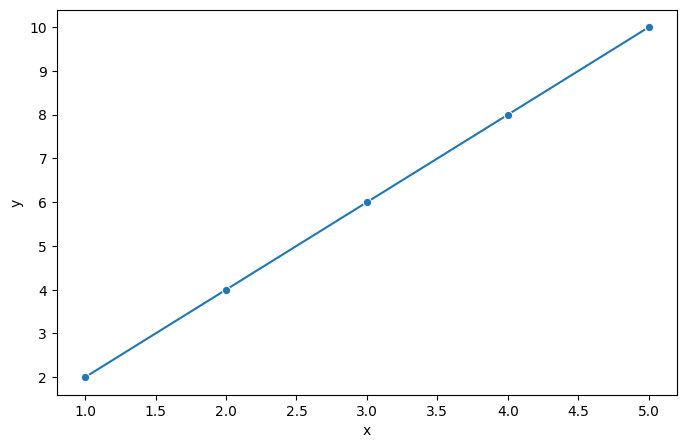

In [24]:
# Step 2: Create a new figure with specific size
plt.figure(figsize=(8, 5))
# Step 3: Plot the line using Seaborn
sns.lineplot(data=data, x="x", y="y", marker="o")

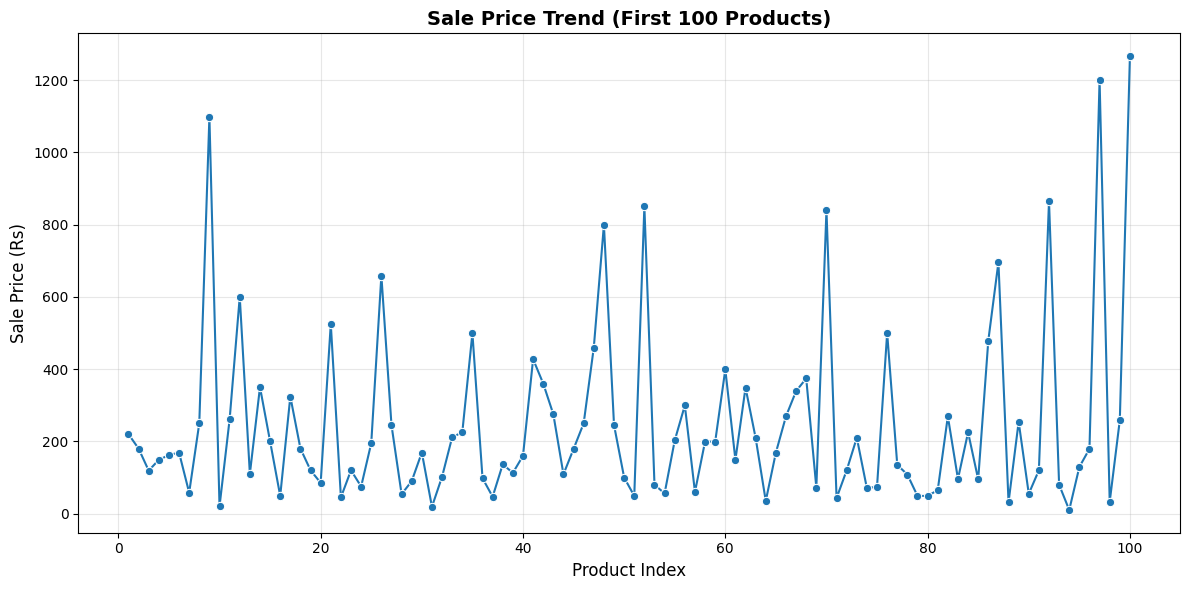

In [29]:
# Example 1: Price trends across product index
plt.figure(figsize=(12, 6))
df_sample = df.head(100)
df_sample_long = df_sample.reset_index()

sns.lineplot(data=df_sample_long, x='index', y='sale_price', marker='o')

plt.title('Sale Price Trend (First 100 Products)', fontsize=14, fontweight='bold')

plt.xlabel('Product Index', fontsize=12)
plt.ylabel('Sale Price (Rs)', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. HISTOGRAM – sns.histplot()
-------------------------------------------

**Purpose:**  
Show *distribution* and *frequency* of numerical data.

**Best for:**  
- Understanding how data is spread  
- Identifying patterns, clusters, or outliers  

###  Key Features
- Flexible **binning options** (number of bins controls granularity)  
- **KDE (Kernel Density Estimation)** overlay for smooth curve visualization  
- Compare **multiple distributions** easily with `hue` parameter  

---




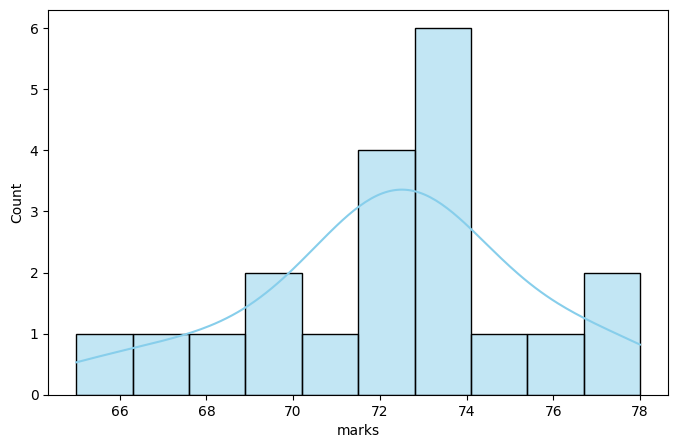

In [43]:
# Step 1: Create a small sample dataset with one cluster

# Most students scored around 70–80
data = pd.DataFrame({
    "marks": [65, 67, 68, 70, 73, 74, 75, 76, 77, 72,
              70, 71, 72, 72, 72, 73, 73, 73, 73, 78]
})

# Step 2: Create a new figure
plt.figure(figsize=(8, 5))

# Step 3: Plot histogram with KDE
sns.histplot(data=data, x="marks", bins=10, kde=True, color="skyblue")

# Step 4: Show the plot
plt.show()

###  Example: *Distribution of ratings*  
We plot the distribution of `rating` values to see how prices are spread across products.

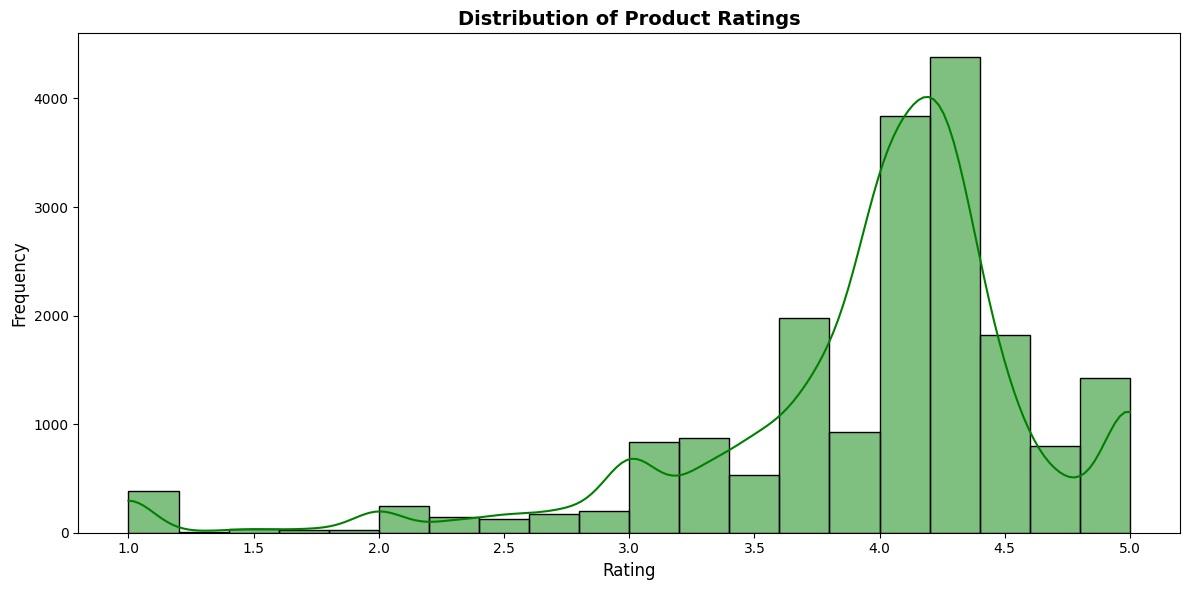

In [33]:
# Example 2: Distribution of ratings with KDE

plt.figure(figsize=(12, 6))  # Create a figure with width=12 and height=6

sns.histplot(data=df_clean, x='rating', bins=20, kde=True, color='green')  # Plot histogram of ratings with 20 bins, KDE curve, and green bars

plt.title('Distribution of Product Ratings', fontsize=14, fontweight='bold')  # Add plot title with font size and bold style
plt.xlabel('Rating', fontsize=12)  # Label the X-axis
plt.ylabel('Frequency', fontsize=12)  # Label the Y-axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


### Understanding Histogram vs KDE

- **Histogram** → shows frequency counts using bars.  
- **KDE line** → a smooth curve that estimates the probability distribution of ratings.  
- **Peaks in the KDE curve** → ranges where ratings are most common.  
- **Flat/low parts** → ranges where ratings are rare.  
- **Example:** If ratings are mostly between 3.5 and 4.5, the KDE curve will rise in that region, forming a “hill” of density.


## 9. SCATTER PLOT – sns.scatterplot()
---------------------------------------------------

**Purpose:**  
Visualize the relationship between two continuous variables. Each point represents an observation.

**Best for:**  
- Detecting **correlations** (positive, negative, or none)  
- Identifying **patterns, clusters, or outliers** in data  

### Key Features
- **Color coding with `hue`** → differentiate categories by color  
- **Size variation with `size`** → represent another variable by point size  
- **Multiple categorical grouping** → combine hue and size for richer insights  
- **Automatic legend creation** → Seaborn generates legends for colors and sizes automatically  

### Example Code


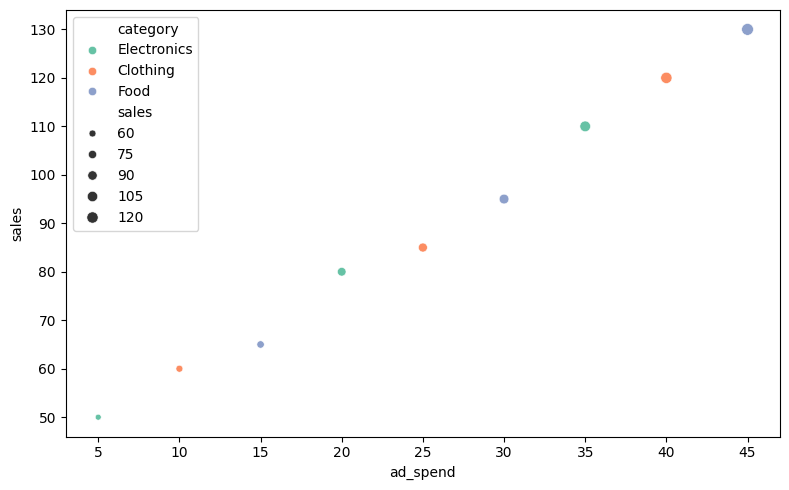

In [49]:
# Step 1: Create a sample dataset with 3 categories (Electronics, Clothing, Food)
data = pd.DataFrame({
    "ad_spend": [5, 10, 15, 20, 25, 30, 35, 40, 45],   # Advertising spend in lakhs
    "sales":    [50, 60, 65, 80, 85, 95, 110, 120, 130],  # Sales revenue in lakhs
    "category": ["Electronics","Clothing","Food",
                 "Electronics","Clothing","Food",
                 "Electronics","Clothing","Food"]  # 3 categories
})

# Step 2: Create a new figure
plt.figure(figsize=(8, 5))

# Step 3: Plot scatter plot
# hue="category" → color points by product category (Electronics, Clothing, Food)
# size="sales" → vary point size based on sales values
# palette="Set2" → use Seaborn’s Set2 color palette for distinct category colors
sns.scatterplot(data=data, x="ad_spend", y="sales", hue="category", size="sales", palette="Set2")


# Step 4: Show the plot
plt.tight_layout()
plt.show()

In [50]:
# Let's plot on our data:

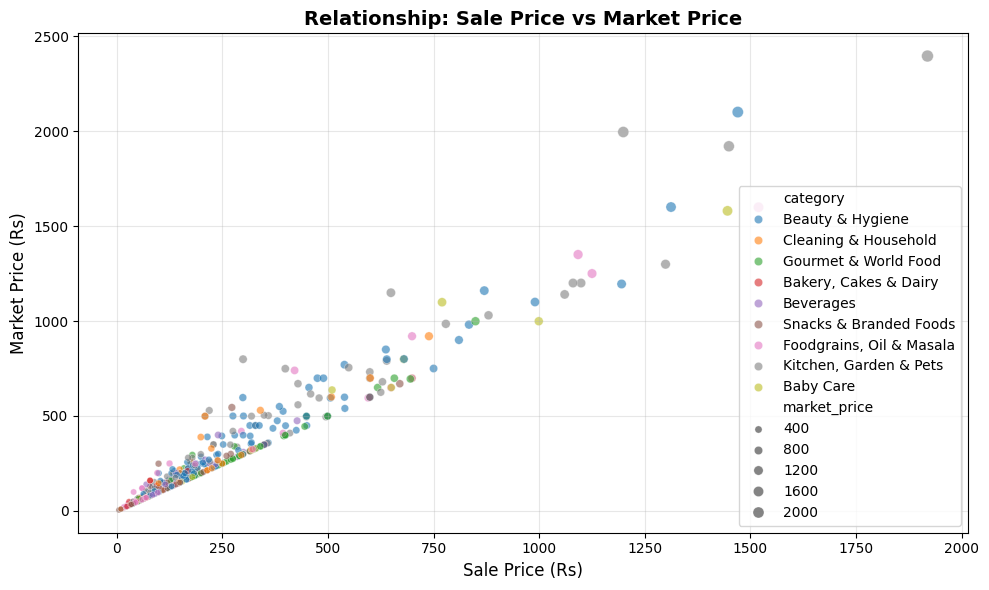

In [54]:
plt.figure(figsize=(10, 6))  # Create a figure with width=10 and height=6

df_scatter = df_clean.sample(500)  # Randomly select 500 rows from df_clean for plotting

# Plot scatter plot:
# hue='category' → color points by product category (e.g., Electronics, Clothing, Food)
# alpha=0.6 → make points semi-transparent to reduce overlap
sns.scatterplot(data=df_scatter, x='sale_price', y='market_price', hue='category',size = 'market_price' , alpha=0.6)

plt.title('Relationship: Sale Price vs Market Price', fontsize=14, fontweight='bold')  # Add plot title
plt.xlabel('Sale Price (Rs)', fontsize=12)  # Label the X-axis
plt.ylabel('Market Price (Rs)', fontsize=12)  # Label the Y-axis

plt.grid(True, alpha=0.3)  # Add grid lines with light transparency
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

## 10. BOX PLOT – sns.boxplot()
-------------------------------------------

**Purpose:**  
Visualize the distribution of data, highlighting the **median**, **quartiles**, and **outliers**.  
Each box shows the spread of values, making it easy to compare across categories.

**Best for:**  
- Comparing distributions between groups  
- Detecting outliers  
- Understanding data spread and variability  

### Key Features
- **Cleaner than Matplotlib’s boxplot** → Seaborn provides a polished, modern look  
- **Easy categorical comparison** → Compare multiple groups side by side  
- **Better handling of multiple groups** → Works well with grouped categorical data  
- **Automatic outlier detection** → Points outside whiskers are plotted as outliers  

### Example Code


/tmp/ipython-input-1710532074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="category", y="sale_price", palette="Set2")


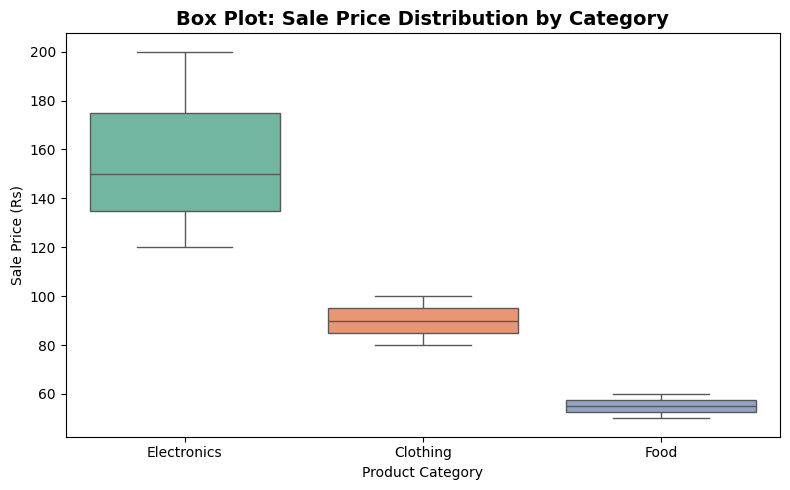

In [56]:
# Sample dataset: product categories and sale prices
data = pd.DataFrame({
    "category": ["Electronics","Electronics","Electronics","Clothing","Clothing","Clothing","Food","Food","Food"],
    "sale_price": [120, 150, 200, 80, 90, 100, 50, 55, 60]
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="category", y="sale_price", palette="Set2")

plt.title("Box Plot: Sale Price Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Product Category")
plt.ylabel("Sale Price (Rs)")
plt.tight_layout()
plt.show()

## 11. PAIR PLOT – sns.pairplot()
---------------------------------------------

**Purpose:**  
Explore relationships between multiple variables at once. Each subplot shows how two variables relate, while the diagonal shows individual distributions.

**Best for:**  
- Initial data exploration  
- Discovering correlations between variables  
- Spotting clusters, trends, or anomalies  

### Key Features
- **Shows all pairwise relationships** → scatter plots for every variable combination  
- **Diagonal shows distributions** → histograms or KDE plots for each variable  
- **Categorical coloring with `hue`** → color points by category (e.g., product type, class)  
- **Quick pattern discovery** → instantly highlights correlations or group differences  

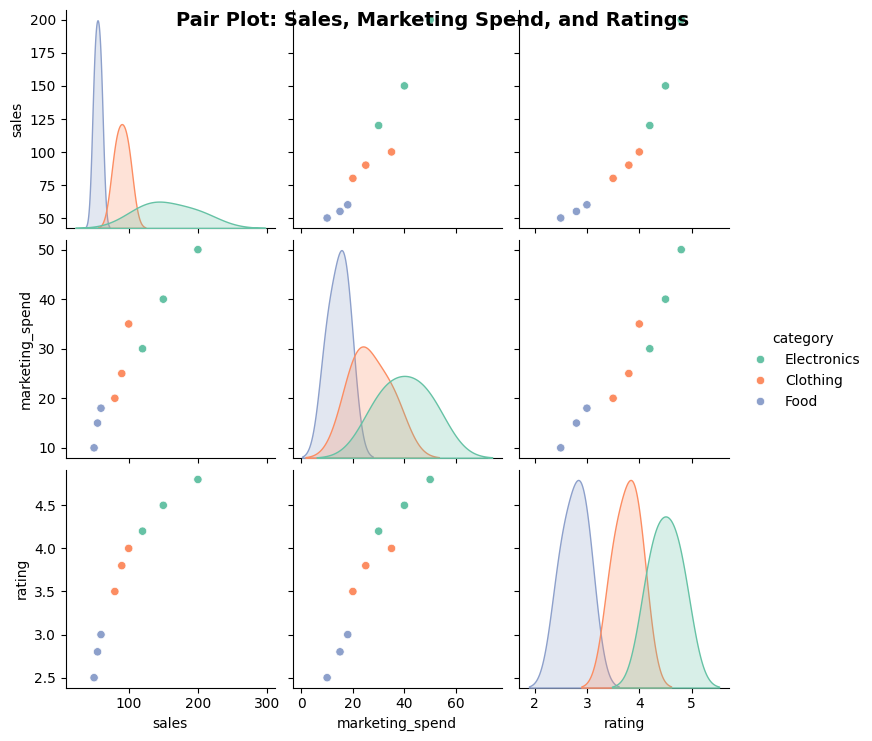

In [62]:
# Sample dataset: sales, marketing spend, and customer ratings
data = pd.DataFrame({
    "sales": [120, 150, 200, 80, 90, 100, 50, 55, 60],
    "marketing_spend": [30, 40, 50, 20, 25, 35, 10, 15, 18],
    "rating": [4.2, 4.5, 4.8, 3.5, 3.8, 4.0, 2.5, 2.8, 3.0],
    "category": ["Electronics","Electronics","Electronics",
                 "Clothing","Clothing","Clothing",
                 "Food","Food","Food"]
})


# Create pair plot
sns.pairplot(data=data, hue="category", palette="Set2")

plt.suptitle("Pair Plot: Sales, Marketing Spend, and Ratings", fontsize=14, fontweight="bold")
plt.show()

### Pair Plot Insights

- **Electronics**: high marketing spend, high sales, high ratings → strongest category.  
- **Clothing**: mid‑range in all three variables.  
- **Food**: lowest spend, lowest sales, lowest ratings.  

**Patterns:**  
All relationships show positive correlation — more marketing spend → more sales → higher ratings.  

**Pair Plot Value:**  
Quickly reveals category differences and correlations across multiple variables.


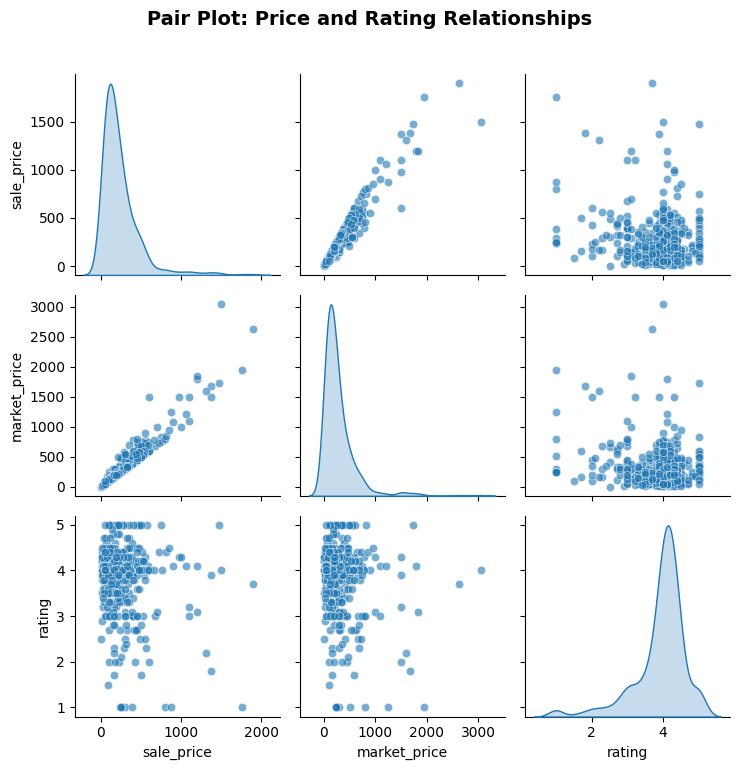

In [67]:
# Create a subset with numerical columns
df_pair = df_clean[['sale_price', 'market_price', 'rating']].sample(500)

sns.pairplot(df_pair, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot: Price and Rating Relationships',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary of Key Seaborn Plots

### 1. Bar Plot – `sns.barplot()`
- **Purpose:** Shows the **average sale price** across different product categories.  
- **Usage:** Helps compare categories (e.g., Electronics vs Clothing vs Food) by their mean values.  
- **Insight:** Quickly highlights which category has the highest or lowest average sale price.  
- **Best for:** Summarizing categorical comparisons with error bars for confidence intervals.

---

### 2. Line Plot – `sns.lineplot()`
- **Purpose:** Visualizes **price trends** across the product index (e.g., first 100 products).  
- **Usage:** Connects data points to show progression or change over an ordered sequence.  
- **Insight:** Reveals upward/downward trends, seasonal patterns, or anomalies in product prices.  
- **Best for:** Time series or ordered data analysis.

---

### 3. Histogram – `sns.histplot()`
- **Purpose:** Displays the **distribution of product ratings**.  
- **Usage:** Groups ratings into bins to show frequency counts.  
- **Insight:** Identifies skewness, common rating ranges, and whether ratings are balanced or biased.  
- **Best for:** Understanding how values are spread across a single variable.

---

### 4. Scatter Plot – `sns.scatterplot()`
- **Purpose:** Explores the **relationship between sale price and market price**.  
- **Usage:** Plots individual points, optionally colored by category.  
- **Insight:** Reveals correlations (positive/negative), clusters, or outliers between two variables.  
- **Best for:** Detecting linear/non-linear relationships and category differences.

---

### 5. Box Plot – `sns.boxplot()`
- **Purpose:** Visualizes the **distribution of sale prices by category**, including median and outliers.  
- **Usage:** Each box shows quartiles, whiskers, and outliers for a category.  
- **Insight:** Highlights variability, spread, and extreme values in sale prices.  
- **Best for:** Comparing distributions and detecting outliers across groups.

---

### 6. Pair Plot – `sns.pairplot()`
- **Purpose:** Explores **relationships between multiple numerical variables** (sale price, market price, rating).  
- **Usage:** Creates a grid of scatter plots for each variable pair, with distributions on the diagonal.  
- **Insight:** Quickly reveals correlations, category differences, and overall data patterns.  
- **Best for:** Initial data exploration with 3–6 numerical variables.

---

##  Overall Takeaway
- **Bar/Box plots** → Compare categories.  
- **Line/Scatter plots** → Show trends and relationships.  
- **Histogram** → Understand distribution of one variable.  
- **Pair Plot** → Explore multiple variables together.  

Together, these plots provide a **complete toolkit for exploratory data analysis (EDA)** in Seaborn.
